<div style="background-color:rgba(100, 160, 200, 0.33);">

<h1>Assignment 3 - Mobile Tracking</h1>

<p>
    <b>Abstract</b>: Monitor and analyze the mobility of nearby mobile device users, using Wi-Fi probe requests.
</p>

</div>

<div style="background-color:rgba(100, 160, 200, 0.33);">
<h3> Device vendor frequency </h3>
<p>
    The data is from the probe requests collected at the Chicago airport.
<p>

In [21]:
%matplotlib inline

import csv
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

lst = []
vendor = [['Apple', 0],
          ['Google', 0],
          ['Samsung', 0],
          ['LGE', 0],
          ['HTC', 0],
          ['Huawei', 0],
          ['Xiaomi', 0],
          ['HMD', 0], 
          ['Nest', 0]]

def get_unique_list(file):
    with open(file, newline='') as f:
        reader = csv.reader(f)
        for row in reader:
            lst.append(row[2])
        return Counter(lst)
    
def create_histogram(list, ven):
    for v in ven:
        for lst in list:
            if lst.startswith(v[0]):
                v[1] += 1
    return ven

lst_c = get_unique_list('airport_chicago/probe_req.csv')
hist_c = create_histogram(lst_c, vendor)
print(hist_c)

[['Apple', 69], ['Google', 71], ['Samsung', 42], ['LGE', 11], ['HTC', 5], ['Huawei', 2], ['Xiaomi', 2], ['HMD', 1], ['Nest', 3]]


<div style="background-color:rgba(100, 160, 200, 0.33);">
<h2> Visualization </h2>
<h3> Chicago Airport Data </h3>

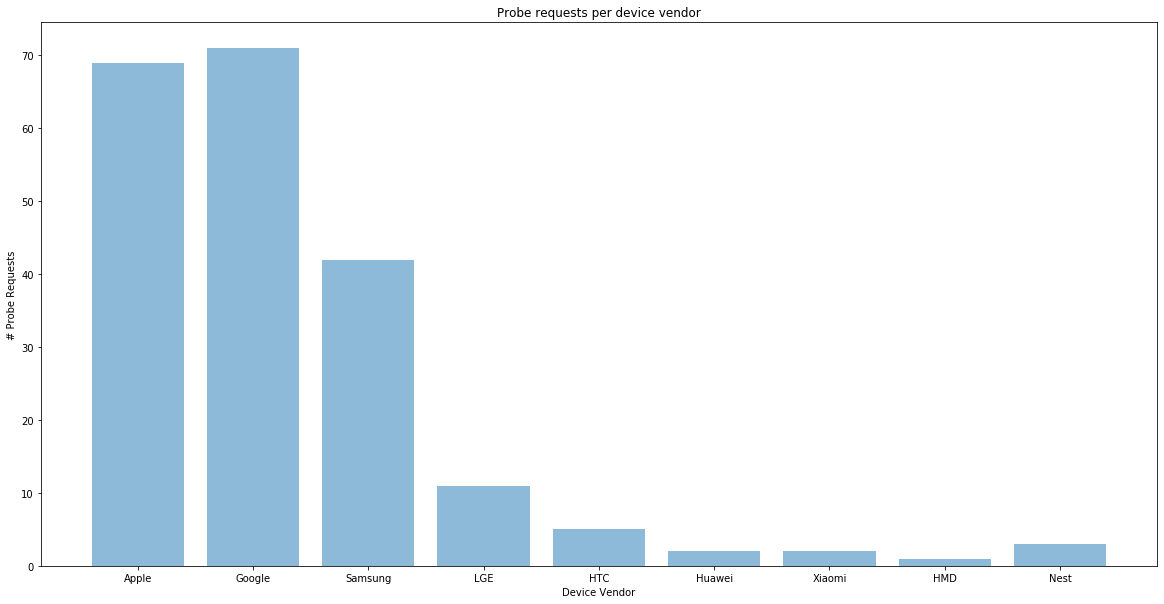

In [22]:
def plot_histogram(lst):
    plt.figure(3,figsize=(20,10)) 
    
    y_pos = np.arange(len(lst))
    accesses = [x[1] for x in lst]
    
    plt.bar(y_pos, accesses, align='center', alpha=0.5) 
    plt.xticks(range(len(lst)), [x[0] for x in lst], size='medium')
 
    plt.xlabel('Device Vendor')
    plt.ylabel('# Probe Requests')
    plt.title('Probe requests per device vendor')
    plt.show()
    
plot_histogram(hist_c)

<div style="background-color:rgba(100, 160, 200, 0.33);">
<h3> Warsaw Airport Data </h3>

In [23]:
vendor = [['Apple', 0],
          ['Google', 0],
          ['Samsung', 0],
          ['LGE', 0],
          ['HTC', 0],
          ['Huawei', 0],
          ['Xiaomi', 0],
          ['HMD', 0], 
          ['Nest', 0]]

lst_w = get_unique_list('airport_warsaw/probe_req.csv')
hist_w = create_histogram(lst_w, vendor)
print(hist_w)

[['Apple', 130], ['Google', 95], ['Samsung', 58], ['LGE', 11], ['HTC', 5], ['Huawei', 7], ['Xiaomi', 7], ['HMD', 1], ['Nest', 3]]


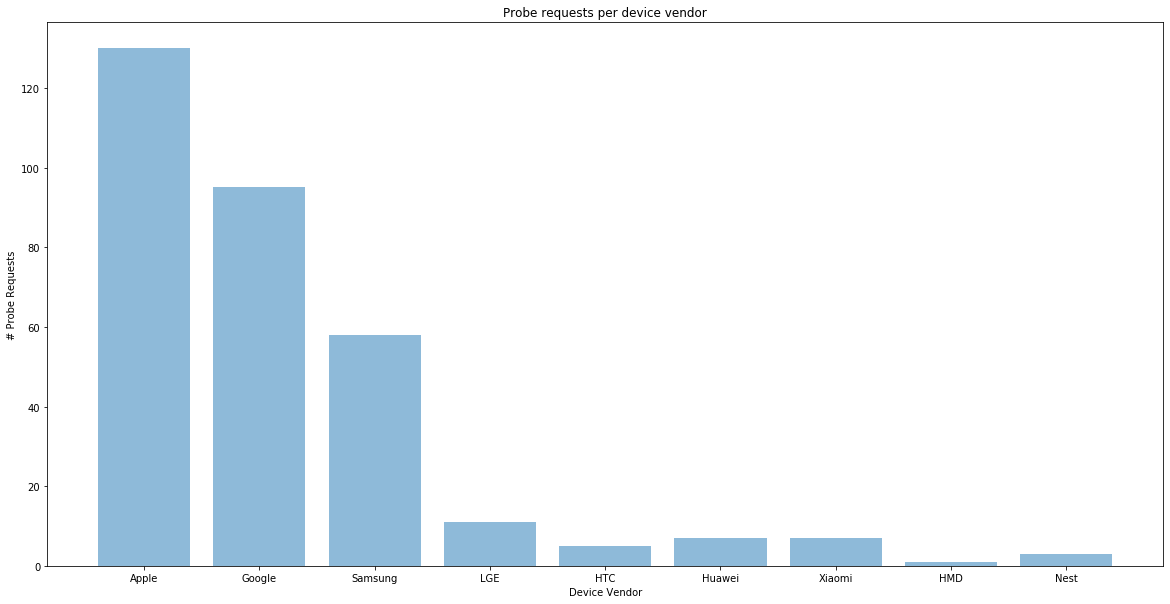

In [24]:
plot_histogram(hist_w)

<div style="background-color:rgba(100, 160, 200, 0.33);">
<h2> Analysis </h2>

The device vendor distribution is similar in both the captures as infered from the plots. Apple is the single most popular device vendor followed by Google and its Android counterparts.

<h3> Wildcard or not? </h3>

In [82]:
def get_info_list(file):
    lst_info = []
    with open(file, newline='') as f:
        reader = csv.reader(f)
        for row in reader:
            lst_info.append(row[6])
        return lst_info
    
def isWildcard(list):
    count = 0
    for lst in list:
        if 'Wildcard' in lst: 
            count += 1
    return count    

lst_i_c = get_info_list('airport_chicago/probe_req.csv')
wild_c = isWildcard(lst_i_c)
wildcard_per_c = (wild_c/len(lst_i_c))*100
print("At Chicago airport, " + str(round(wildcard_per_c, 2)) + "% of probe requests are wildcard requests.")

lst_i_w = get_info_list('airport_warsaw/probe_req.csv')
wild_w = isWildcard(lst_i_w)
wildcard_per_w = (wild_w/len(lst_i_w))*100
print("At Warsaw airport, " + str(round(wildcard_per_w, 2)) + "% of probe requests are wildcard requests.")

At Chicago airport, 78.18% of probe requests are wildcard requests.
At Warsaw airport, 81.25% of probe requests are wildcard requests.
